In [164]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import datetime as datetime

In [165]:
df = pd.read_csv('sources/house-data.csv')
df.head()

,Index,distict_name,member,party,prior_experience,education,assumed_office,residence,born
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)"
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)"
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)"
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)"
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)"


In [166]:
#List of states
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [167]:
#States df
states_df = pd.DataFrame(states, columns=['name'])

In [168]:
#Check data types
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
Index,int64
distict_name,object
member,object
party,object
prior_experience,object
education,object
assumed_office,object
residence,object
born,object


In [169]:
#Check column names
df.columns

Index(['Index ', 'distict_name', 'member ', 'party ', 'prior_experience ',
       'education ', 'assumed_office ', 'residence ', 'born '],
      dtype='object')

In [170]:
#Change district_name t0 district
df.rename(columns={'distict_name': 'district'}, inplace=True)

In [171]:
#Change member to name
df.rename(columns={'member ': 'name'}, inplace=True)

In [172]:
#remove trailing space in column names
df.columns = df.columns.str.rstrip()

In [173]:
#how many rows
df.shape[0]

435

In [174]:
#how many rows missing data
df.isnull().sum().sort_values(ascending=False)

name                4
party               4
prior_experience    4
education           4
assumed_office      4
residence           4
born                4
Index               0
district            0
dtype: int64

In [175]:
#change born into a string
df['clean_born'] = df['born'].astype('|S')

In [176]:
df['clean_born'] = df['clean_born'].astype('str')

In [177]:
df.head()

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)","b'June 17, 1958 (age 64)'"
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)","b'September 26, 1966 (age 55)'"
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)","b'July 16, 1958 (age 64)'"
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)","b'July 22, 1965 (age 57)'"
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)","b'April 29, 1954 (age 68)'"


In [178]:
#Remove everything after the ( from clean_born
df['clean_born'] = df['born'].str.split('(').str[0]
df[['born', 'clean_born']].head()

,born,clean_born
0,"June 17, 1958 (age 64)","June 17, 1958"
1,"September 26, 1966 (age 55)","September 26, 1966"
2,"July 16, 1958 (age 64)","July 16, 1958"
3,"July 22, 1965 (age 57)","July 22, 1965"
4,"April 29, 1954 (age 68)","April 29, 1954"


In [194]:
#Turn clean_born into datetime type
df['clean_born'] = pd.to_datetime(df['clean_born'])

In [180]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
Index,int64
district,object
name,object
party,object
prior_experience,object
education,object
assumed_office,object
residence,object
born,object
clean_born,datetime64[ns]


In [181]:
#check for null values and replace
df[df['residence'].isnull()]

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born
7,8,Alaska at-large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
212,213,Minnesota 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
275,276,New York 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
279,280,New York 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [182]:
#Sort by most missing data
df.isnull().sum().sort_values(ascending=False)

name                4
party               4
prior_experience    4
education           4
assumed_office      4
residence           4
born                4
clean_born          4
Index               0
district            0
dtype: int64

In [183]:
#Fill in missing data
df["name"].fillna("None", inplace=True)

In [184]:
df["party"].fillna("None", inplace=True)

In [185]:
df["residence"].fillna("None", inplace=True)

In [186]:
df["prior_experience"].fillna("None", inplace=True)

In [187]:
df["education"].fillna("None", inplace=True)

In [188]:
df["assumed_office"].fillna(0, inplace=True)

In [189]:
df["born"].fillna(0, inplace=True)

In [190]:
df["clean_born"].fillna(datetime.date.today(), inplace=True)

In [196]:
df.isnull().sum().sort_values(ascending=False)

Index               0
district            0
name                0
party               0
prior_experience    0
education           0
assumed_office      0
residence           0
born                0
clean_born          0
dtype: int64

In [192]:
#Turn clean_born into datetime type
df['clean_born'] = pd.to_datetime(df['clean_born'])

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born


In [197]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
Index,int64
district,object
name,object
party,object
prior_experience,object
education,object
assumed_office,object
residence,object
born,object
clean_born,datetime64[ns]


In [200]:
#function to calculate age based on birthdate and round
def calculate_age(born):
    today = datetime.date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return int(round(age))

In [201]:
#apply age function
df['age'] = df['clean_born'].apply(calculate_age)
df.head()

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68


In [202]:
#Create string of all state names
s='|'.join(states)
print(s)

Alaska|Alabama|Arkansas|Arizona|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Iowa|Idaho|Illinois|Indiana|Kansas|Kentucky|Louisiana|Massachusetts|Maryland|Maine|Michigan|Minnesota|Missouri|Mississippi|Montana|North Carolina|North Dakota|Nebraska|New Hampshire|New Jersey|New Mexico|Nevada|New York|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Virginia|Vermont|Washington|Wisconsin|West Virginia|Wyoming


In [203]:
#Pull names that match district column into single item array
df['test_state']=df.district.str.findall(s)
df.sample()

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
54,55,California 34,Jimmy Gomez,Democratic,California State Assembly,"University of California, Los Angeles (BA)\nHa...",2017 (special),Los Angeles,"November 25, 1974 (age 47)",1974-11-25,47,[California]


In [204]:
df.reset_index(inplace = True)
df.head()

,index,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
0,0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64,[Alabama]
1,1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55,[Alabama]
2,2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64,[Alabama]
3,3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57,[Alabama]
4,4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68,[Alabama]


In [206]:
df.drop('index', inplace=True, axis=1)

In [207]:
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64,[Alabama]
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55,[Alabama]
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64,[Alabama]
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57,[Alabama]
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68,[Alabama]


In [208]:
#Pull state name string out of test_state array
df['clean_state'] = df['test_state'].str[0]
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state,clean_state
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64,[Alabama],Alabama
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55,[Alabama],Alabama
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64,[Alabama],Alabama
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57,[Alabama],Alabama
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68,[Alabama],Alabama


In [209]:
#Get rid of old state name column
df.drop('test_state', inplace=True, axis=1)

In [221]:
#Create cut bins
mybins=[25,35,45,55,65,75,85,100]

# Create some labels for the new variable
mylabels=['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
# Use the .cut method to create a new variable using those cut points and labels.
df['age_range']=pd.cut(df['age'], bins=mybins, labels=mylabels)
# Check it out!
df[['age', 'age_range']].sample()

,age,age_range
170,51,45-54


In [219]:
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,clean_state,age_range
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64,Alabama,55-64
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55,Alabama,45-54
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64,Alabama,55-64
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57,Alabama,55-64
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68,Alabama,65-74


In [222]:
df[df['age'] == 0]

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,clean_state,age_range
7,Alaska at-large,None,None,None,None,0,None,0,2022-09-07,0,Alaska,NaN
212,Minnesota 1,None,None,None,None,0,None,0,2022-09-07,0,Minnesota,NaN
275,New York 19,None,None,None,None,0,None,0,2022-09-07,0,New York,NaN
279,New York 23,None,None,None,None,0,None,0,2022-09-07,0,New York,NaN


In [16]:
df.to_csv('../data-science-project-8/sources/us-house-117.csv')

In [212]:
#Data frame with count of reps by age range
df2 = df.groupby(['age_range', 'party'])['name'].count()
df2 = df2.unstack(level=-1)
df2.reset_index(level=0, inplace=True)
df2.head(25)

party,age_range,Democratic,None,Republican
0,25-34,6,0,5
1,35-44,25,0,33
2,45-54,41,0,43
3,55-64,57,0,79
4,65-74,65,0,46
5,75-84,25,0,5
6,85+,1,0,0


In [213]:
pd.DataFrame(df2.dtypes, columns=["DataType"])

,DataType
party,
age_range,category
Democratic,int64
None,int64
Republican,int64


In [41]:
#Save ages dataframe to csv
df2.to_csv('../data-science-project-8/sources/us-house-117-ages.csv')

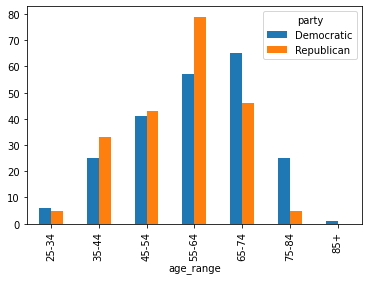

In [214]:
#Group bar chart of age ranges
fig = df2.plot(x='age_range', y=['Democratic', 'Republican'], kind='bar');

In [123]:
#filter on a specific state
df3 = df[df['clean_state'] == 'New York'].groupby(['age_range', 'party'])['name'].count()
df3 = df3.unstack(level=-1)
df3.reset_index(level=0, inplace=True)
df3.head(25)

party,age_range,Democratic,None,Republican
0,25-34,3,0,0
1,35-44,0,0,4
2,45-54,3,0,1
3,55-64,6,0,2
4,65-74,5,0,0
5,75-84,1,0,0
6,85+,0,0,0


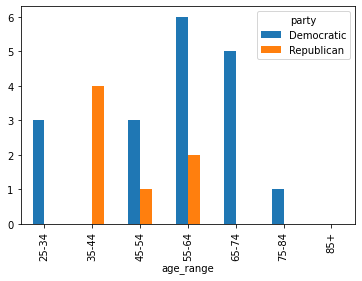

In [124]:
df3.plot(x='age_range', y=['Democratic', 'Republican'], kind='bar');

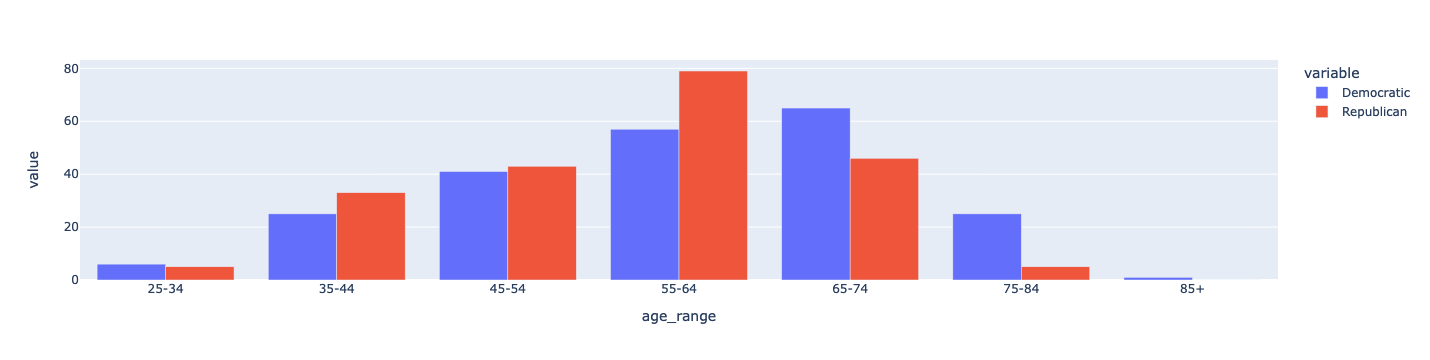

In [95]:
#Testing for app
data2 = df.groupby(['age_range', 'party'])['name'].count()
data2 = data2.unstack(level=-1)
data2.reset_index(level=0, inplace=True)
fig2 = px.bar(data2, x='age_range', y=['Democratic','Republican'],
              barmode='group')
fig2

In [111]:
def make_figure(varname):
    mycolorbartitle = "117th US House Reps"
    mygraphtitle = f'Age Range of 117th US House Reps of {varname}'
    #mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
    color_discrete_sequence = ['#3264A8','#A83232']
    
    data2 = df[df['clean_state']==varname].groupby(['age_range', 'party'])['name'].count()
    data2 = data2.unstack(level=-1)
    data2.reset_index(level=0, inplace=True)
    fig2 = px.bar(data2, x='age_range', y=['Democratic','Republican'],
              barmode='group',labels={'value':'number of reps','variable':'party'},color_discrete_sequence=color_discrete_sequence)
    fig2.update_layout(
        width=1200,
        height=500,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )
    return fig2

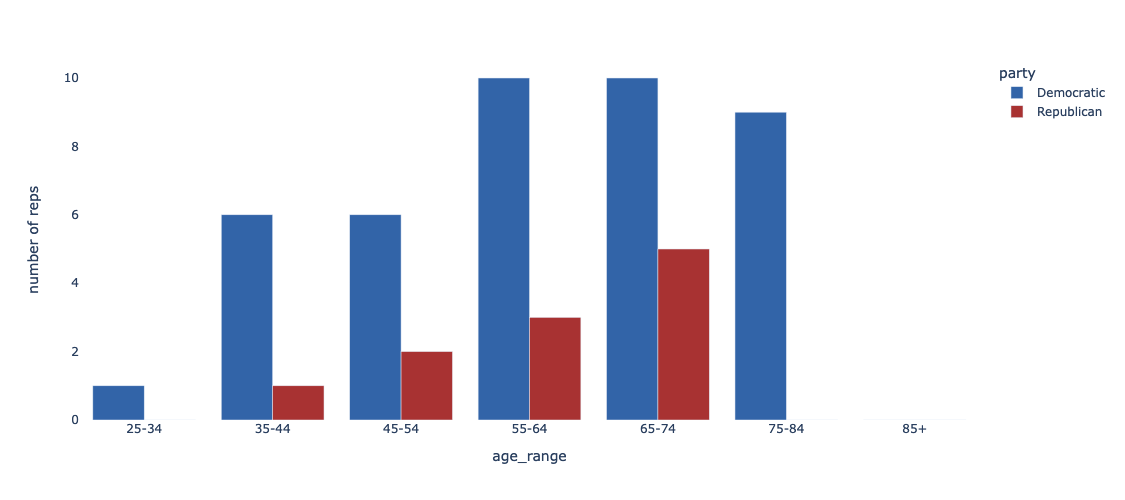

In [122]:
make_figure('California')